# Air Quality Regression

#### Diondra Stubbs
#### CSC 310 Assignment 8
#### 2022 November 2

## Dataset Description

This dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. More about this dataset: https://archive.ics.uci.edu/ml/datasets/Air+Quality

#### Dataset Features
1. Date (DD/MM/YYYY)
2. Time (HH.MM.SS)
3. CO(GT) - True hourly averaged concentration CO in mg/m^3 (reference analyzer)
4. PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)  
5. NMHC(GT) - True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
6. C6H6(GT) - True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
7. PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
8. NOx(GT) - True hourly averaged NOx concentration in ppb (reference analyzer)
9. PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
10. NO2(GT) - True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
11. PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
12. PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
13. T - Temperature in Â°C
14. RH - Relative Humidity (%)
15. AH - Absolute Humidity

In [1]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
sns.set_theme(font_scale=2,palette='colorblind')

In [2]:
# loading in data
data_url = 'https://raw.githubusercontent.com/stubbsdiondra/PortfolioProjects/main/Air%20Quality%20Analysis%20Project/airquality.csv'

In [3]:
# loading into a dataframe
air_df = pd.read_csv(data_url, sep = ';', decimal = ',')

In [4]:
# printing the dataframe to see if it needs cleaning or fixing
air_df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
air_df.shape

(9471, 17)

There should be 9358 rows since there are only 9358 instances. Some rows need to be dropped.

In [6]:
air_df.dropna(axis=0, how= 'all', inplace=True)
air_df.dropna(axis=1, inplace=True)

In [7]:
air_df.replace(to_replace= -200, value= np.NaN, inplace= True)
air_df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,NaN,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,NaN,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,NaN,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,NaN,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [8]:
air_df.fillna(air_df.mean(), inplace= True)

## Regression Task 

The task is to predict the air quality given the other measurements in the dataset.

The dataset has columns Date, Time, CO(GT), PT08.S1(CO), NMHC(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), PT08.S5(O3), T, RH, and AH. The desired target variable is the temperature (T).

In [9]:
feature_vars = air_df
target_var = air_df['T']

## Exploratory Data Analysis

In [10]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


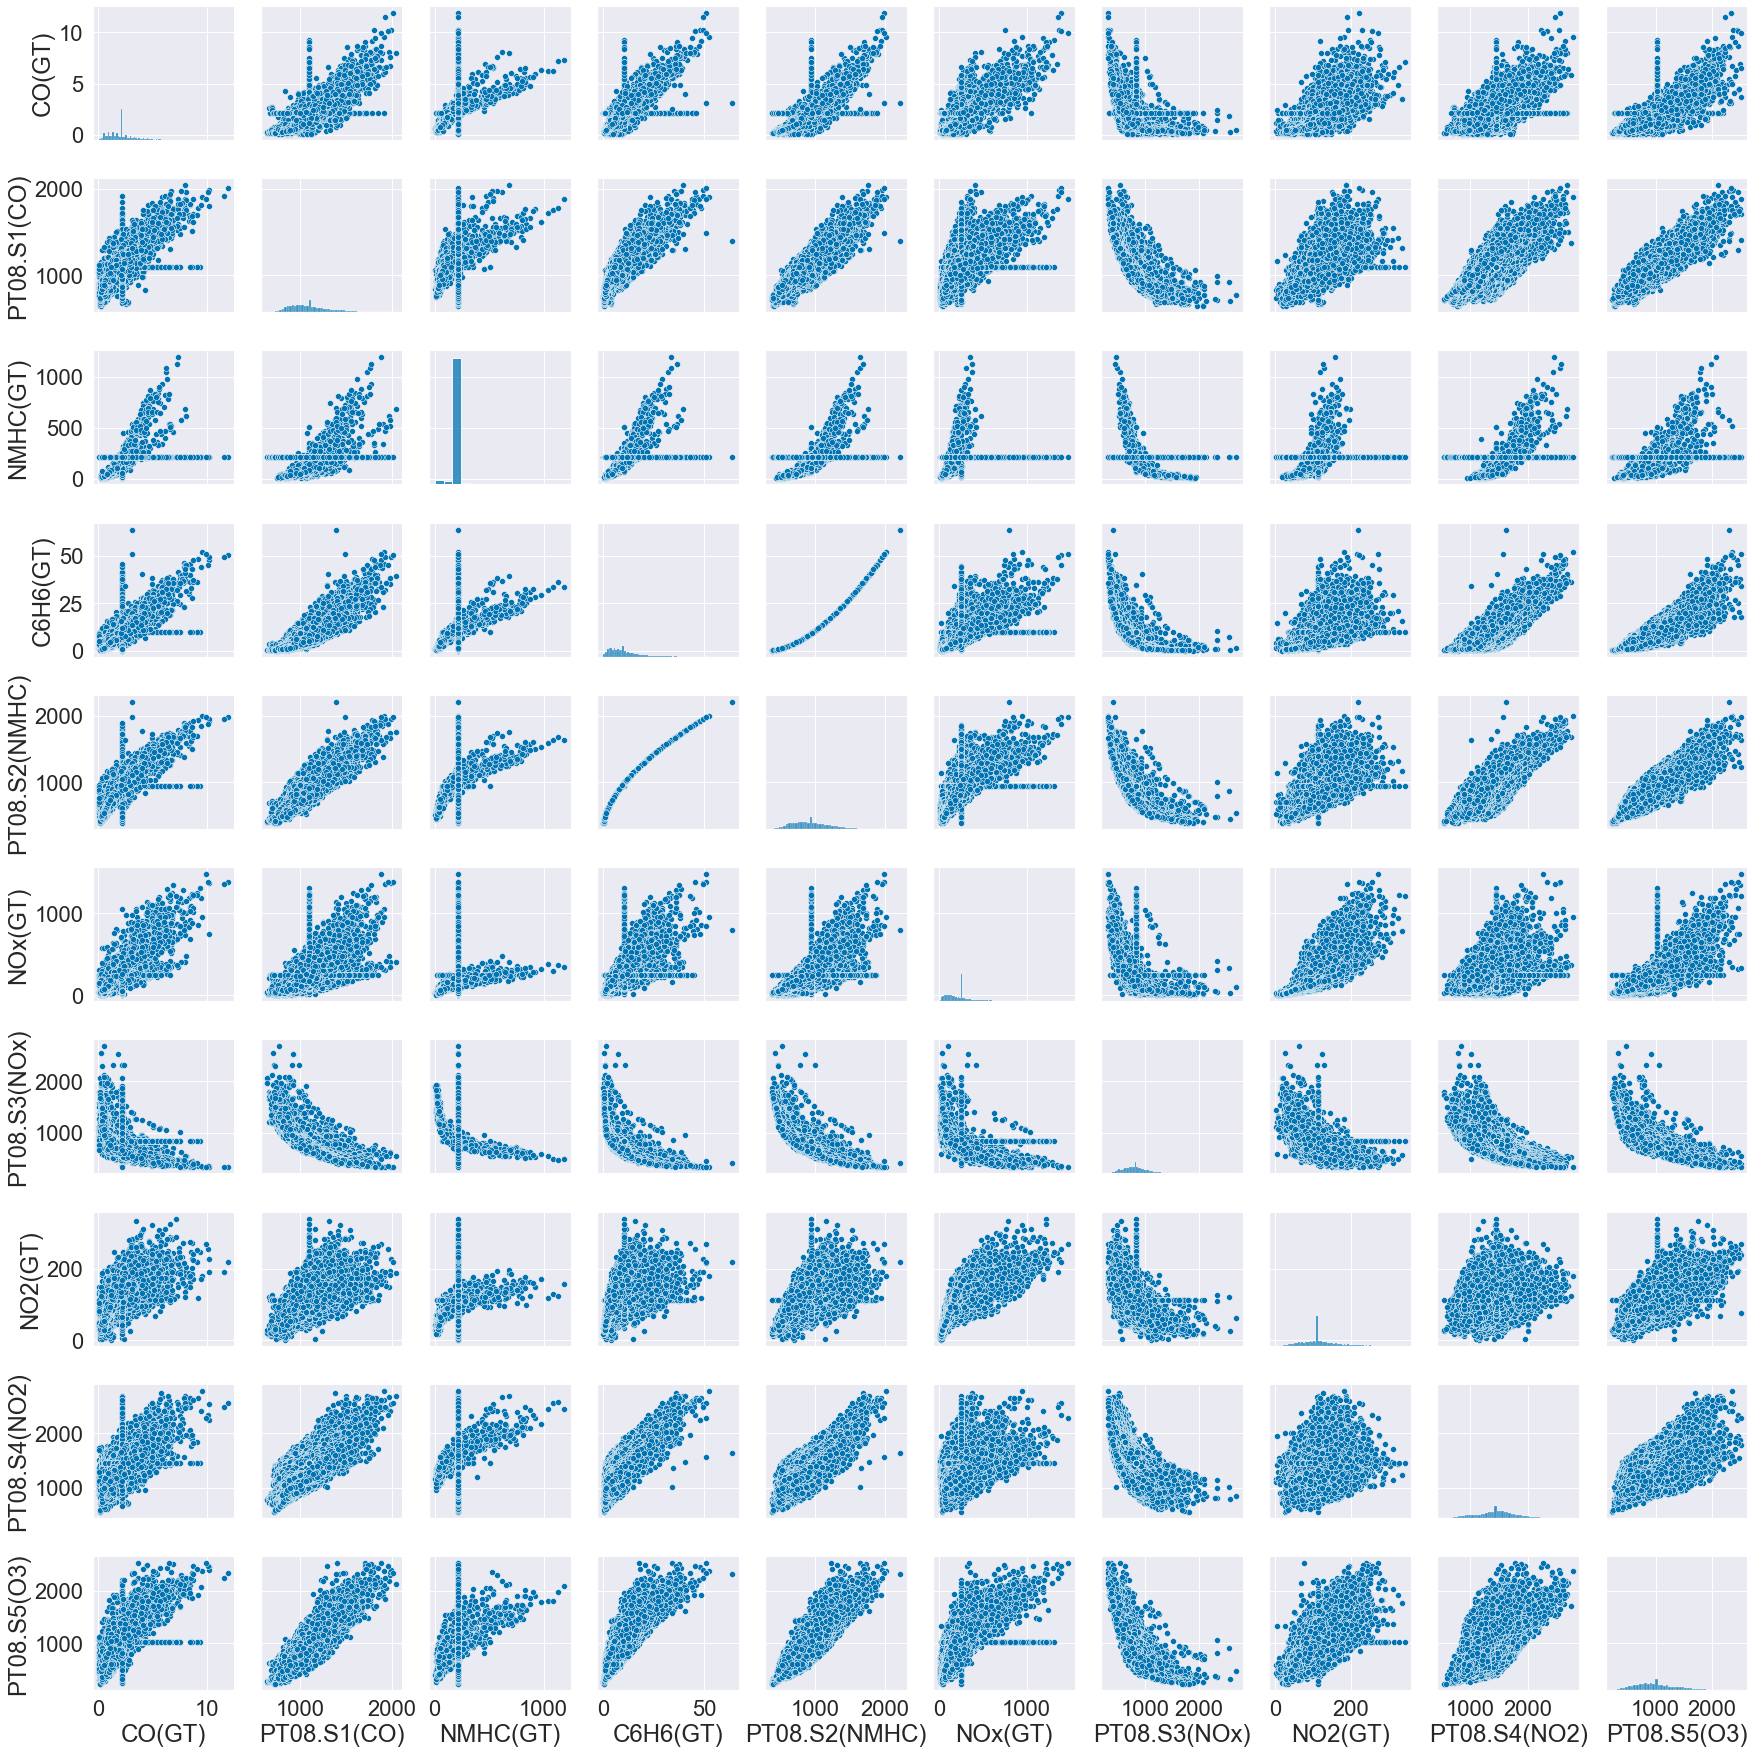

In [11]:
# outputting pair plots to determine whether the data is linear.
sns.pairplot(air_df[["Date","Time","CO(GT)","PT08.S1(CO)","NMHC(GT)","C6H6(GT)","PT08.S2(NMHC)","NOx(GT)","PT08.S3(NOx)","NO2(GT)","PT08.S4(NO2)","PT08.S5(O3)"]])

From the top, I know that the Date and Time will not be valuable in predicting the temperature, the pair plot already excludes them. 

I also wonder if there are other variables that are not as strongly correlated. In STA 412 and DSP 393G, I learned to work with correlation and I want to use pearson correlation to see which variables will be useful in predicting the temperature.

In [12]:
# Using pearson correlation to find out what features contribute most to predicting our target
air_quality = air_df.corr('pearson')
air_quality

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.773394,0.289975,0.812361,0.795578,0.762273,-0.613877,0.646349,0.558232,0.759027,0.020257,0.043198,0.043274
PT08.S1(CO),0.773394,1.000000,0.278282,0.883795,0.892964,0.615941,-0.771938,0.562843,0.682881,0.899324,0.048627,0.114606,0.135324
NMHC(GT),0.289975,0.278282,1.000000,0.281928,0.279761,0.098180,-0.261997,0.156510,0.232979,0.240592,0.066782,-0.052784,0.037173
C6H6(GT),0.812361,0.883795,0.281928,1.000000,0.981950,0.616801,-0.735744,0.535919,0.765731,0.865689,0.198956,-0.061681,0.167972
PT08.S2(NMHC),0.795578,0.892964,0.279761,0.981950,1.000000,0.601773,-0.796703,0.561180,0.777254,0.880578,0.241373,-0.090380,0.186933
NOx(GT),0.762273,0.615941,0.098180,0.616801,0.601773,1.000000,-0.563270,0.763074,0.205485,0.688205,-0.235636,0.192587,-0.126868
PT08.S3(NOx),-0.613877,-0.771938,-0.261997,-0.735744,-0.796703,-0.563270,1.000000,-0.569479,-0.538468,-0.796569,-0.145112,-0.056740,-0.232017
NO2(GT),0.646349,0.562843,0.156510,0.535919,0.561180,0.763074,-0.569479,1.000000,0.140655,0.629443,-0.165466,-0.080569,-0.291392
PT08.S4(NO2),0.558232,0.682881,0.232979,0.765731,0.777254,0.205485,-0.538468,0.140655,1.000000,0.591144,0.561270,-0.032188,0.629641
PT08.S5(O3),0.759027,0.899324,0.240592,0.865689,0.880578,0.688205,-0.796569,0.629443,0.591144,1.000000,-0.027172,0.124956,0.070751


In [13]:
air_quality['T'].sort_values(ascending=False)

T                1.000000
AH               0.656397
PT08.S4(NO2)     0.561270
PT08.S2(NMHC)    0.241373
C6H6(GT)         0.198956
NMHC(GT)         0.066782
PT08.S1(CO)      0.048627
CO(GT)           0.020257
PT08.S5(O3)     -0.027172
PT08.S3(NOx)    -0.145112
NO2(GT)         -0.165466
NOx(GT)         -0.235636
RH              -0.578621
Name: T, dtype: float64

Some of the variables are negatively correlated with temperature meaning that as temperature increases, they decrease. I want to make them positive by taking the absolute value.

In [14]:
abs(air_quality['T'].sort_values(ascending= False))

T                1.000000
AH               0.656397
PT08.S4(NO2)     0.561270
PT08.S2(NMHC)    0.241373
C6H6(GT)         0.198956
NMHC(GT)         0.066782
PT08.S1(CO)      0.048627
CO(GT)           0.020257
PT08.S5(O3)      0.027172
PT08.S3(NOx)     0.145112
NO2(GT)          0.165466
NOx(GT)          0.235636
RH               0.578621
Name: T, dtype: float64

We can see that NMHC(GT), PT08.S1(CO), CO(GT), and PT08.S5(O3) aren't as good contributions to predicting out target T. We're going to drop these variables and T from out feature_vars

In [15]:
# dropping  features that have low correlations
feature_vars = feature_vars.drop('Date', axis = 1)
feature_vars = feature_vars.drop('Time', axis = 1)
feature_vars = feature_vars.drop('NMHC(GT)', axis = 1)
feature_vars = feature_vars.drop('PT08.S1(CO)', axis = 1)
feature_vars = feature_vars.drop('CO(GT)', axis = 1)
feature_vars = feature_vars.drop('PT08.S5(O3)', axis = 1)
feature_vars = feature_vars.drop('T', axis = 1)

In [16]:
feature_vars.head()

,C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),RH,AH
0,11.9,1046.0,166.0,1056.0,113.0,1692.0,48.9,0.7578
1,9.4,955.0,103.0,1174.0,92.0,1559.0,47.7,0.7255
2,9.0,939.0,131.0,1140.0,114.0,1555.0,54.0,0.7502
3,9.2,948.0,172.0,1092.0,122.0,1584.0,60.0,0.7867
4,6.5,836.0,131.0,1205.0,116.0,1490.0,59.6,0.7888


## Linear Regression

In [17]:
# fitting a linear model with 75% training data
X_train,X_test, y_train,y_test = train_test_split(feature_vars, target_var, train_size=.75)

In [18]:
X_train.shape

(7017, 8)

Testing it on 25% held out test data and measure the fit with two metrics and one plot

In [19]:
regr_db = linear_model.LinearRegression()

In [20]:
regr_db.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'positive': False}

In [21]:
regr_db.fit(X_train,y_train)

LinearRegression()

In [22]:
regr_db.__dict__

{'fit_intercept': True,
 'normalize': False,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 8,
 'coef_': array([-4.39550848e-01,  9.46520446e-03,  1.58706721e-03,  1.34832209e-03,
        -4.38302102e-03,  5.13197480e-03, -3.49207640e-01,  1.43651776e+01]),
 '_residues': 36894.9279717981,
 'rank_': 8,
 'singular_': array([3.81476207e+04, 1.94257574e+04, 1.12313620e+04, 6.58161755e+03,
        2.18085967e+03, 1.18060060e+03, 9.65114607e+01, 1.62426515e+01]),
 'intercept_': 7.823958627099707}

### Fitting the linear model.

In [23]:
y_pred = regr_db.predict(X_test)
y_pred.shape

(2340,)

### Computing the R^2 score for linear regression.

In [24]:
#Predict using the linear model.
regr_db.score(X_test,y_test)

0.9266592278257884

In [25]:
r2_score(y_test, y_pred)

0.9266592278257884

### Examining Residuals

Plotting the residuals

Text(0, 0.5, 'y_pred')

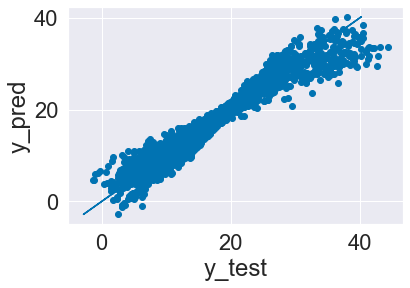

In [26]:
plt.scatter(y_test,y_pred)
plt.plot(y_pred,y_pred)

plt.xlabel('y_test')
plt.ylabel('y_pred')

Text(0, 0.5, 'y_pred')

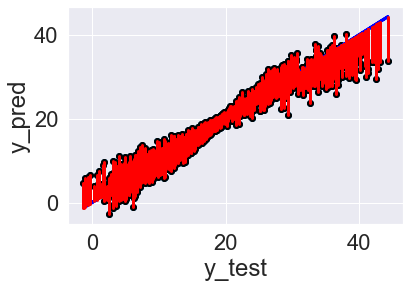

In [27]:
plt.scatter(y_test,y_pred)

plt.scatter(y_test, y_pred, color='black')
plt.plot(y_test, y_test, color='blue', linewidth=3)

# draw vertical lines frome each data point to its predict value
[plt.plot([x,x],[yp,yt], color='red', linewidth=3)
         for x, yp, yt in zip(y_test, y_pred,y_test)];

plt.xlabel('y_test')
plt.ylabel('y_pred')

In [28]:
regr_db.coef_, regr_db.intercept_

(array([-4.39550848e-01,  9.46520446e-03,  1.58706721e-03,  1.34832209e-03,
        -4.38302102e-03,  5.13197480e-03, -3.49207640e-01,  1.43651776e+01]),
 7.823958627099707)

The linear model is:

Temperature = 8.048 - 0.41361*C6H6(GT) + 0.00877*PT08.S2(NMHC) + 0.00135*NOx(GT) + 0.00131*PT08.S3(NOx) - 0.00339*NO2(GT) + 0.00521*PT08.S4(NO2) - 0.34935*RH + 14.392*AH

### Inspecting the model

This model does make sense. Our R^2 is 0.9281631983543226 or ~93% meaning that ~93% of the data points fall on the regression line and ~93% of the independent/predictor variables in this model explain all the variation in y (Temperature). 

The residuals show us that the residuals are spread out around the regression line but pretty close to it.

The coefficients tell us the relationship between the temperature and the other features.  When the temperature increases by one C6H6 decreases by 0.41, PT08.S2(NMHC) increases by 0.009, NOx increases by 0.001, PT08.S3(NOx) increases by 0.001, NO2 decreases by 0.003, PT08.S4(NO2) increases by 0.005, RH decreases by 0.349 and AH increases by 14.39.